Customer Churn Prediction Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
print('number of rows = {}'.format(data.shape[0]))
print('number of cols or features  = {}'.format(data.shape[1]))

number of rows = 10000
number of cols or features  = 11


Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

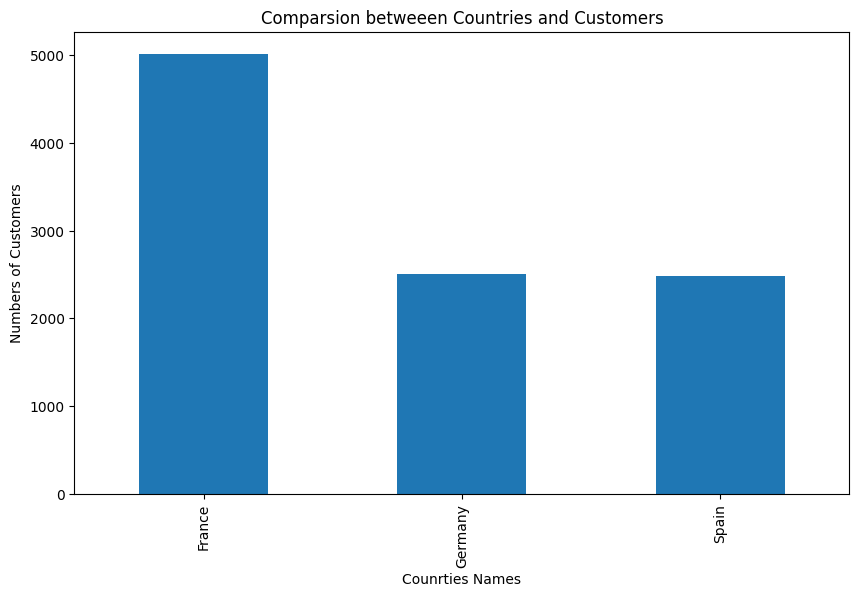

In [7]:
plt.figure(figsize=(10, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

In [8]:
data= pd.get_dummies(data, columns= ['Geography', 'Gender'], drop_first=True)


In [9]:
X=data.drop(columns=['Exited'])
y=data['Exited']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train.shape


(7500, 11)

In [14]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(6, activation='relu',input_dim=11),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.6711 - loss: 0.6223
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7959 - loss: 0.4717
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7993 - loss: 0.4537
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8025 - loss: 0.4421
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8074 - loss: 0.4381
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8175 - loss: 0.4253
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.8200 - loss: 0.4110
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8164 - loss: 0.4203
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8308 - loss: 0.4072
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8242 - loss: 0.4141
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8346 - loss: 0.4091
Epoch 12/100
235/235 ━━━━━━━━━━

In [15]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3295 - val_accuracy: 0.8635 - val_loss: 0.3351
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.8663 - loss: 0.3220 - val_accuracy: 0.8608 - val_loss: 0.3349
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8550 - loss: 0.3408 - val_accuracy: 0.8592 - val_loss: 0.3390
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.8689 - loss: 0.3201 - val_accuracy: 0.8613 - val_loss: 0.3383
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8639 - loss: 0.3241 - val_accuracy: 0.8581 - val_loss: 0.3385
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8593 - loss: 0.3335 - val_accuracy: 0.8597 - val_loss: 0.3385
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8630 - loss: 0.3236 - val_accuracy: 0.8592 - val_loss: 0.3377
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8677 - loss: 0.3

In [17]:
model.evaluate(X_test,y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8631 - loss: 0.3353


[0.34353187680244446, 0.8579999804496765]

In [18]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [19]:
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print('accuracy on test data = {}'.format(test_acc))

accuracy on test data = 0.858


In [20]:
train_pre=model.predict(X_train)
train_pre = (train_pre>0.5)
train_acc=accuracy_score(y_train,train_pre)
print('accuracy on test data = {}'.format(train_acc))

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
accuracy on test data = 0.8666666666666667


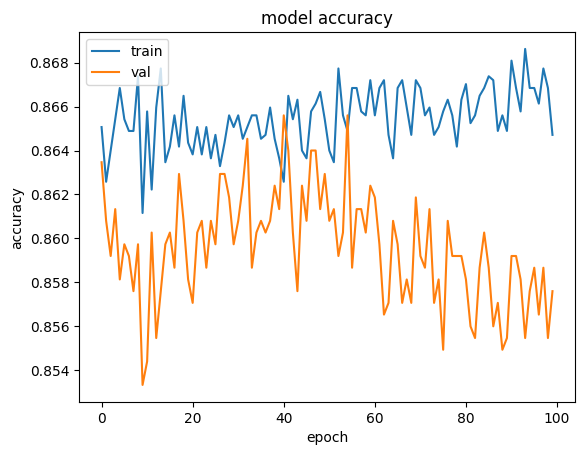

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

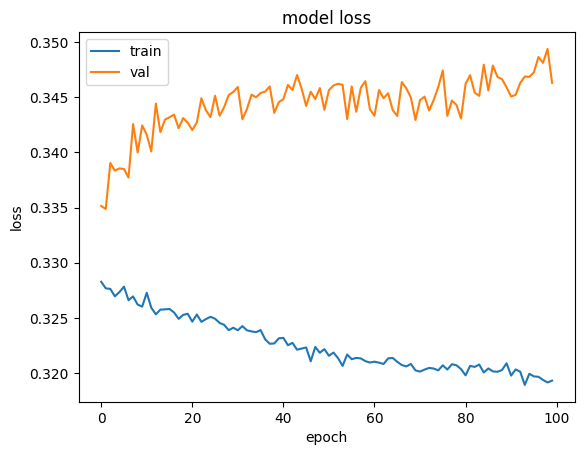

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

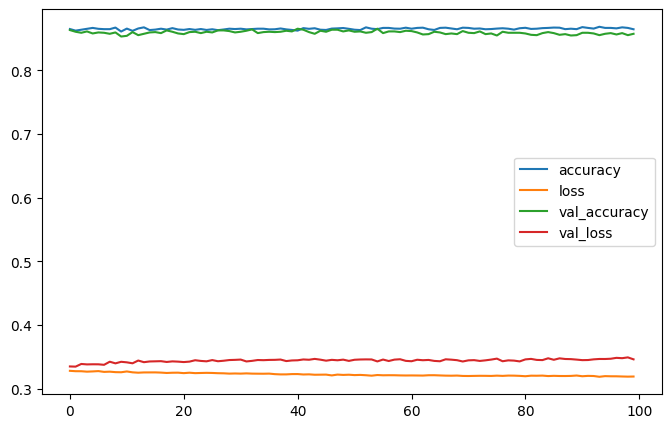

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [24]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [25]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[1907,   75],
       [ 280,  238]], dtype=int64)

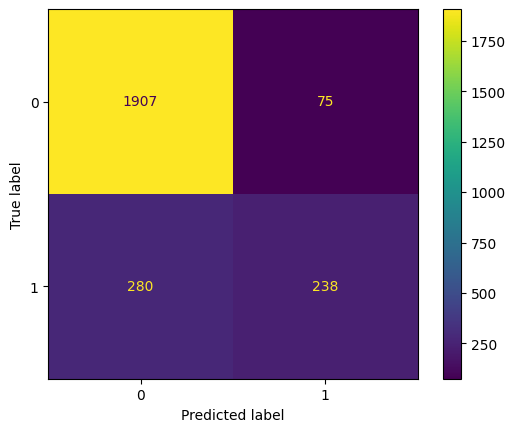

In [26]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_metric, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()